# Tutorial:   Statistics and Biomechanics  (ISB 2019, Calgary)

&copy; Todd Pataky, 2019

# Notebook 2:  Probability functions

The purposes of this notebook are:
1. To describe the probability functions that are relevant to classical hypothesis testing
2. To clarify the meaning of "parameteric" probability functions
3. To demonstrate which probability functions are used to: (a) calculate critical thresholds, and (b) calculate p values.
4. To demonstrated how probabilities can be verified numerically using random number simulation

___
### Part 1: Visualizing probability functions

The four most important probability functions are:

* [Probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF)
* [Cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF)
* [Survival function](https://en.wikipedia.org/wiki/Survival_function) (SF)
* [Inverse survival function](https://en.wikipedia.org/wiki/Survival_function) (ISF)

A PDF characterizes the distribution of the randomly variable. The random variable represents random fluctuations in either the underlying, observed data, or in a test statistic like the t value.

The PDF for the Gaussian distribution is:

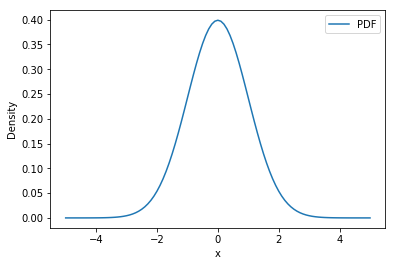

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot

x   = np.linspace(-5, 5, 101)
pdf = stats.norm.pdf(x)

ax  = pyplot.axes()
ax.plot(x, pdf, label='PDF')
ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.legend()

Here $x$ is the random variable and "density" represents the probability that $x$ will adopt a value in the range [$x_0$, $x_1$], where $x_0$ and $x_1$ are arbitrary values ($-\infty < x_0 < x_1 < +\infty$). Note that "density", unlike the other three probability functions discsussed in this notebook, has no practical interpretation for a single value of $x$; a PDF only acquires practical meaning for a range of values [$x_0$, $x_1$].

In the PDF plot above we can see that, by symmetry, the probability that $x$ is greater than zero (i.e., in the range [0, $\infty$]) is 0.5. This can be verified, and more generally, probabilities can be calculated in two ways:

1. Analytically:  using mathematical functions
2. Numerically: simulating random data to verify the analytical results

Analytical calculations are very fast (a few ms) , and numerical simulations are comparatively very slow (thousands of times slower). The analytical approach is to use the survival function (SF) or cumulative distribution function (CDF), which are simply PDF integrals:

$$\textrm{SF}(u) = \int_{u}^{+\infty} \textrm{PDF}(x)dx$$

$$\textrm{CDF}(u) = \int_{-\infty}^{u} \textrm{PDF}(x)dx$$

In [4]:
p = stats.norm.sf(0)
print('P(x>0) = %.5f' %p)

P(x>0) = 0.50000


Note that "survival" can be interpreted as the probability that a random variable will survive a threshold $u$, or $P(x>u)$. The CDF provides the complimentary probability: $P(x<u)$:

In [6]:
p = stats.norm.cdf(0)
print('P(x<0) = %.5f' %p)

P(x<0) = 0.50000


The complimentary nature of the SF and CDF can be seen by choosing a different threshold value $u$:

In [14]:
u     = 1.0
p_sf  = stats.norm.sf(u)
p_cdf = stats.norm.cdf(u)

print('P(x>0) = %.5f' %p_sf)
print('P(x<0) = %.5f' %p_cdf)
print('P(x<0) + P(x>0) = %.5f' %(p_cdf + p_sf) )

P(x>0) = 0.15866
P(x<0) = 0.84134
P(x<0) + P(x>0) = 1.00000


The complimentary nature of the CDF and SF can also be seen when plotting the whole functions:

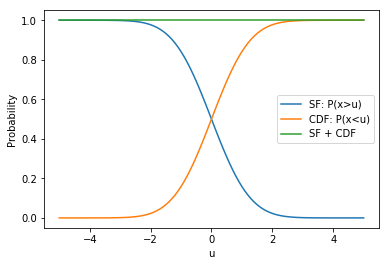

In [15]:
u     = np.linspace(-5, 5, 101)
p_sf  = stats.norm.sf(u)
p_cdf = stats.norm.cdf(u)

ax    = pyplot.axes()
ax.plot(u, p_sf, label='SF: P(x>u)')
ax.plot(u, p_cdf, label='CDF: P(x<u)')
ax.plot(u, p_sf + p_cdf, label='SF + CDF')
ax.set_xlabel('u')
ax.set_ylabel('Probability')
ax.legend()
pyplot.show()

Note that the sum of the SF and CDF for a threshold $u$ is always one. That is, the CDF represents the interval [$-\infty$, $u$], and the SF represents the interval [$u$, $\infty$], so together they represent the interval [$-\infty$, $+\infty$], and the probability that $x$ lies in this interval is 1, or 100%.

While the CDF is usually taught in introductory Statistics class, the SF is more directly relevant to hypothesis testing, as we shall see below.

The final probability function considered in these notebooks is the inverse survival function (ISF), which provides the value $u$ for a specific probability. From the SF plot above we can see that the probability that $x$ is greater than $u$=1 is approximately 0.1. The actualy probability for $u$=1 is:

In [17]:
u    = 1.0
p    = stats.norm.sf(u)
print('P(x>1) = %.5f' %p)

P(x>1) = 0.15866


To find the actual value of $u$ for which $P(x>u)=0.1$, we can use the ISF like this: 

In [20]:
p    = 0.1
u    = stats.norm.isf(p) 
print('u = = %.5f' %u)

u = = 1.28155


Thus $P(x>1.28155) = 0.1$.

We can view the entire ISF like this:

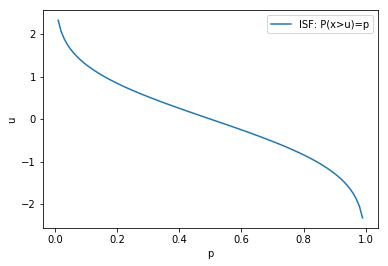

In [25]:
p    = np.linspace(0, 1, 101)
u    = stats.norm.isf(p)

ax   = pyplot.axes()
ax.plot(p, u, label='ISF: P(x>u)=p')
ax.set_xlabel('p')
ax.set_ylabel('u')
ax.legend()
pyplot.show()

As an aside, just liket the SF is complimentary to the CDF, the ISF is complimentary to the [percentile point function](https://en.wikipedia.org/wiki/Quantile_function) (PPF):

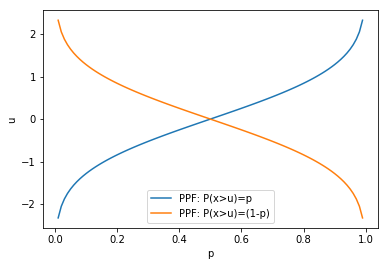

In [26]:
p    = np.linspace(0, 1, 101)
u0   = stats.norm.ppf(p)
u1   = stats.norm.ppf(1-p)

ax   = pyplot.axes()
ax.plot(p, u0, label='PPF: P(x>u)=p')
ax.plot(p, u1, label='PPF: P(x>u)=(1-p)')
ax.set_xlabel('p')
ax.set_ylabel('u')
ax.legend()
pyplot.show()

That is, the ISF for probability $p$ is equivalent to the PPF for probability $(1-p$).

To avoid interpretation complications associated with these complimentary probabilities (SF and CDF, ISF and PPF), the remainder of these notebooks considers only the SF and ISF.

___

### Part 2: